# **Handwritten Arabic Digits Recognition with CNN**
---

## Data preparation

###Data load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
x_train = pd.read_csv("/content/drive/My Drive/colab_files/csvdigitsTrainImages 60k x 784.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/colab_files/csvdigitsTestImages 10k x 784.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/colab_files/csvdigitsTrainLabel 60k x 1.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/colab_files/csvdigitsTestLabel 10k x 1.csv", header=None)

In [ ]:
x_train.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###Data cleaning

In [ ]:
x_train.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Length: 784, dtype: int64

In [ ]:
x_train.isnull().sum().sum()

0

In [ ]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)

In [ ]:
x_test = x_test.reshape(-1, 28, 28, 1)

## CNN model

In [ ]:
from tensorflow import keras
from keras.layers import Dense, Dropout, Input, Conv2D, Flatten, MaxPooling2D, BatchNormalization
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical, plot_model

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 80s 42ms/step - loss: 0.1115 - accuracy: 0.9666
Epoch 2/100
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0409 - accuracy: 0.9874
Epoch 3/100
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0330 - accuracy: 0.9895
Epoch 4/100
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0285 - accuracy: 0.9909
Epoch 5/100
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0260 - accuracy: 0.9923
Epoch 6/100
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0233 - accuracy: 0.9930
Epoch 7/100
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0211 - accuracy: 0.9935
Epoch 8/100
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0195 - accuracy: 0.9937
Epoch 9/100
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0178 - accuracy: 0.9943
Epoch 10/100
1875/1875 [==============================]

In [ ]:
model.evaluate(x_train, y_train)

1875/1875 [==============================] - 22s 12ms/step - loss: 7.7535e-04 - accuracy: 0.9999


[0.0007753503741696477, 0.9998666644096375]

##Data augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
epochs = 100
batch_size = 32 #64, 128, 256, 512

datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

In [ ]:
train_gen = datagen.flow(x_train, y_train,batch_size=batch_size)
test_gen = datagen.flow(x_test, y_test, batch_size=batch_size)

In [ ]:
history = model.fit(train_gen, epochs=epochs, verbose=0,
                   steps_per_epoch=x_train.shape[0]//batch_size,
                   validation_data=test_gen,
                   validation_steps=x_test.shape[0]//batch_size)

## Training and validation curves


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

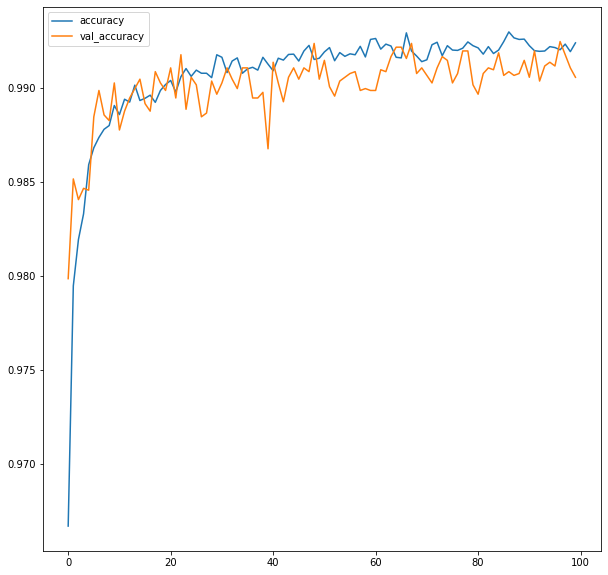

In [ ]:

plt.figure(figsize=(10,10))
plt.plot(history.history["accuracy"], label='Training accuracy')
plt.plot(history.history["val_accuracy"], label='Validation accuracy')
plt.legend(["accuracy", "val_accuracy"])
plt.show()

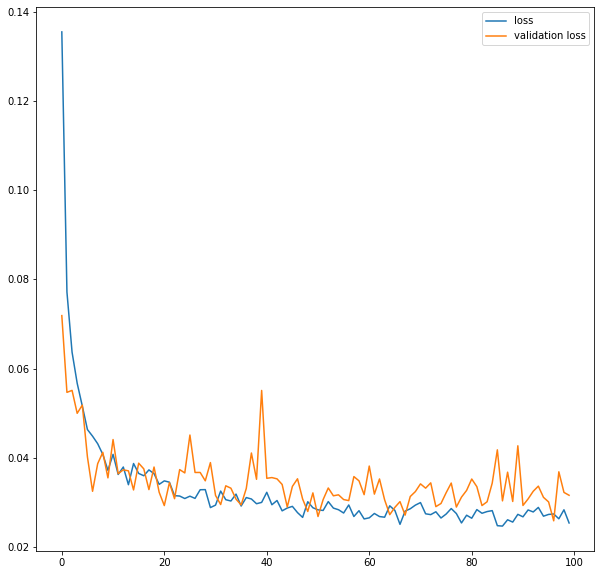

In [ ]:

plt.figure(figsize=(10,10))
plt.plot(history.history["loss"], label='Loss')
plt.plot(history.history["val_loss"], label='Validation Loss')
plt.legend(["loss", "validation loss"])
plt.show()

## Confusion matrix

In [ ]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

Text(69.0, 0.5, 'True')

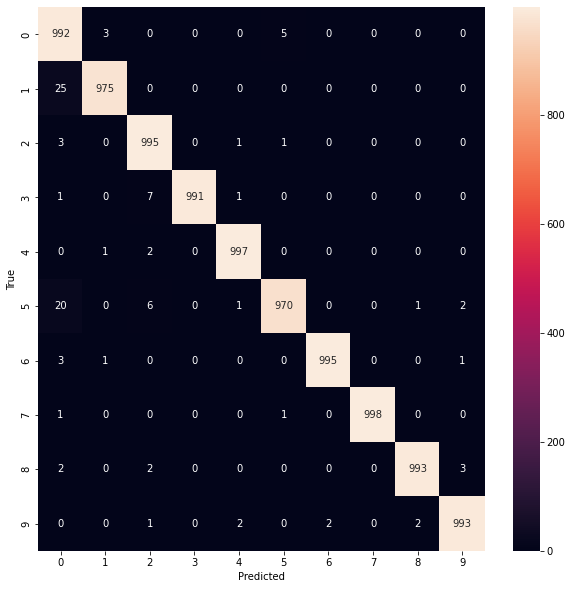

In [ ]:
y_preds = model.predict(x_test)
y_pred_classes = np.argmax(y_preds, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,10))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

## Handwritten digit recognition with CV2

In [ ]:
import imutils
import cv2 as cv
from imutils.contours import sort_contours
from keras.models import load_model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
image = cv.imread("/content/drive/My Drive/colab_files/digitsrec.jpg")
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
blurred = cv.GaussianBlur(gray,(5,5),0)

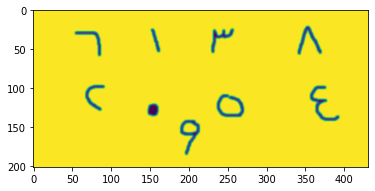

In [ ]:
plt.imshow(blurred)

In [ ]:
edged = cv.Canny(blurred, 30, 150)

cnts = cv.findContours(edged.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method='left-to-right')[0]

chars = []

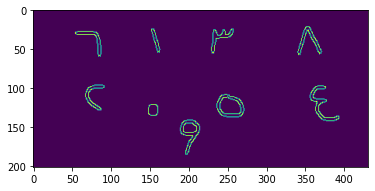

In [ ]:
plt.imshow(edged)

In [ ]:
for c in cnts:
    (x, y, w, h) = cv.boundingRect(c)
    
    if(w>=5 and w<=50) and (h>=15 and h<= 50):
        roi = gray[y:y+h, x:x+w]
        thresh = cv.threshold(roi, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]
        (th, tw) = thresh.shape
        
        if tw > th:
            thresh = imutils.resize(thresh, width=28)
        else:
            thresh = imutils.resize(thresh,height=28)
        (th, tw) = thresh.shape
        dx = int(max(0, 28 - tw) / 2.0)
        dy = int(max(0, 28 - th) / 2.0)
        
        padded = cv.copyMakeBorder(thresh, top=dy, bottom=dy, left=dx, right=dx, borderType=cv.BORDER_CONSTANT, value=(0, 0, 0))
        padded = cv.resize(padded, (28, 28))
        
        padded =padded.astype("float32") / 255.0
        padded = np.expand_dims(padded, axis=-1)
        
        chars.append((padded, (x, y, w, h)))

In [ ]:
boxes = [b[1] for b in chars]
chars = np.array([c[0] for c in chars], dtype="float32")
preds = model.predict(chars)
labelNames = "0123456789"
labelNames = [l for l in labelNames]

4 - 100.00%
8 - 100.00%
0 - 100.00%
0 - 99.92%
5 - 72.45%
0 - 99.94%
5 - 100.00%
2 - 100.00%
9 - 76.38%


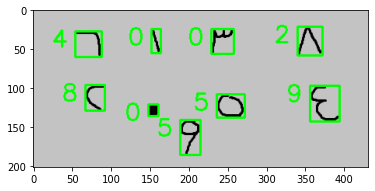

In [ ]:
for (pred, (x, y, w, h)) in zip(preds, boxes):
    i = np.argmax(pred)
    prob = pred[i]
    label = labelNames[i]
    
    print("{} - {:.2f}%".format(label, prob * 100))
    cv.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv.putText(image, label, (x-30, y+20), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    plt.imshow(image)

In [ ]:
model.save("/content/drive/My Drive/colab_files/model07.h5")